# EXERCISES

Examples adapted from the official documentation of tensorflow and scikit-learn

Author: Umberto Michelucci

In [16]:
# matplotlib is a library to plot all sort of data
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In ```scikit-learn``` there are several datasets available for trying out features. They are in the package ```datasets```. In this example we load the digits dataset. That is a low-resolution version of the MNIST dataset.

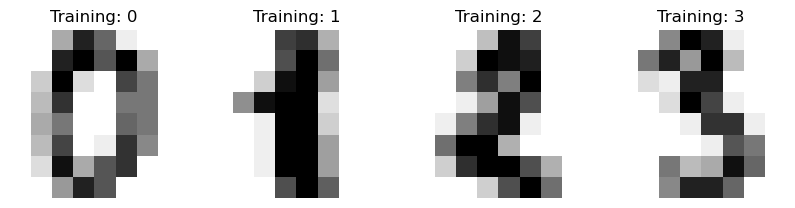

In [17]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [18]:
digits.images.shape

(1797, 8, 8)

In [19]:
# We check the datatype of digits.images
type(digits.images)

numpy.ndarray

# EXERCISE: CHECK HOW UNBALANCED (IF IT IS) THE DATASET IS

Check how many times each digit appear

In [20]:
# ADD YOUR CODE HERE
from collections import Counter

# empty Counter
counter = Counter(digits.target)
counter

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

In [21]:
# Labels are shuffled. Let's check.
digits.target[0:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

The ```shape``` properties of a ```numpy``` array gives you the dimensions and the number of elements along each axis.

# Data Preparation

In this example, we will use a support vector classifier. This kind of model does not understand 2D data structures (as images are), and thus we need to flatten the images. The original dataset are ```8x8``` in size. 

In [22]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [23]:
data.shape

(1797, 64)

after flattening the 2D image has been converted to a one-dimensional vector with 64 elements (8x8).

# Train the model

In the next cell you can see a good example of the **hold-out** approach to model validation. You will learn more about it in one of the next lectures.

In [24]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
# This is an example of the hold-out approach for
# model validation.
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)


SVC(gamma=0.001)

In [33]:
counter = Counter(y_train)
counter

Counter({0: 90, 1: 91, 2: 91, 3: 92, 4: 89, 5: 91, 6: 90, 7: 90, 8: 86, 9: 88})

# EXERCISE: TRY DIFFERENT CLASSIFIERS

In [25]:
# Try a different classifier and check the results.
# You can find difeferent types here: https://scikit-learn.org/stable/supervised_learning.html
# In particular try to visualise the confusion matrix.

After splitting the datasets we now have two: a train and a test portion. We can easily check their shapes.

In [26]:
print("Train set shape: ", X_train.shape)
print("Test set shape: ", X_test.shape)

Train set shape:  (898, 64)
Test set shape:  (899, 64)


# Evaluate the model on the test dataset

In [27]:
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

# Show the prediction visually

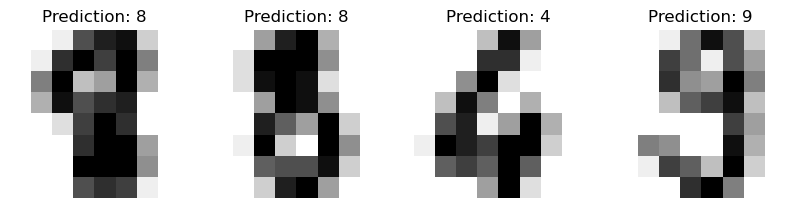

In [28]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

# EXERCISE: CHECK 3 WRONG PREDICTIONS

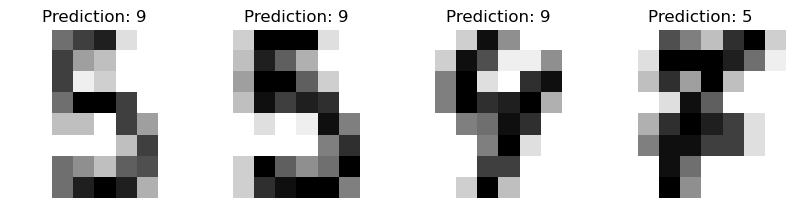

In [32]:
# ADD YOUR CODE HERE
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

wrong_images = []
wrong_predictions = []
for image, true, prediction in zip(X_test, y_test, predicted):
    if (true != prediction):
        wrong_images.append(image)
        wrong_predictions.append(prediction)

for ax, image, prediction in zip(axes, wrong_images, wrong_predictions):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

## Other useful features of ```scikit-learn```

In [12]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




In [15]:
metrics.accuracy_score(y_test, predicted)

0.9688542825361512

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


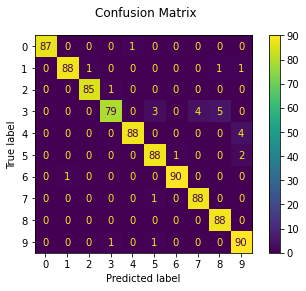

In [8]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# Hold-out approach with multiple splits

In [43]:
accuracy_list = []

# Create a classifier: a support vector classifier


# Split data into 50% train and 50% test subsets
# This is an example of the hold-out approach for
# model validation.
for i in range(500):
    
    clf = svm.SVC(gamma=0.001)
    
    X_train, X_test, y_train, y_test = train_test_split(
        data, digits.target, test_size=0.2, shuffle=True, random_state=i
    )
    

    # Learn the digits on the train subset
    clf.fit(X_train, y_train)
    
    predicted = clf.predict(X_test)
    
    accuracy_list.append(metrics.accuracy_score(y_test, predicted))



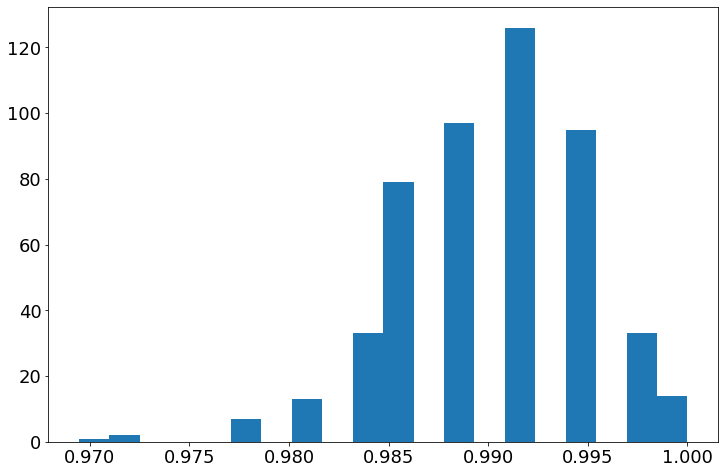

In [44]:
fig = plt.figure(figsize = (12,8))

plt.hist(accuracy_list, bins = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

# EXERCISE: TRY COMPLETELY FROM SCRATCH

In [19]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.0


In [20]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [22]:
train_images.shape

(60000, 28, 28)

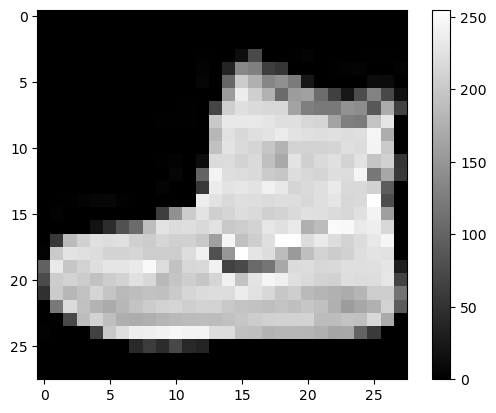

In [24]:
plt.figure()
plt.imshow(train_images[0], cmap = 'gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [25]:
train_images = train_images / 255.0

test_images = test_images / 255.0

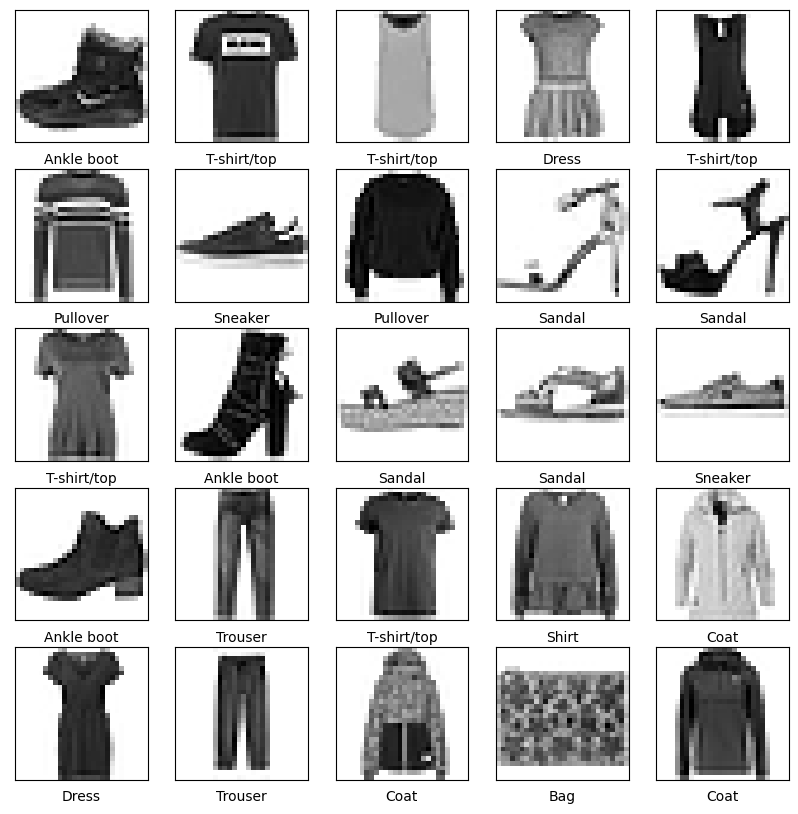

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [27]:
# Build a network to classify the images

In [28]:
# compile the model

In [29]:
# Fit the model

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

In [30]:
# ADD YOUR CODE HERE
# SHOW 4-5 WRONG PREDICTIONS (WRONG CLASS)

In [31]:
# SHOW THE CONFUSION MATRIX FOR THE CLASSIFICATION ON THE TEST DATASET

In [ ]:
# EVALUATE THE DISTRIBUTION OF A METRIC OF YOUR CHOICE WHEN DOING MULTIPLE SPLITS